In [1]:
# para
target_year = 2024

In [2]:
# 読み込みファイルパスの設定とimportしたいmoduleパス(pythonパス)の設定
from pathlib import Path
import os, sys

CURRENT_DIR = Path(os.getcwd())
PJ_DIR = CURRENT_DIR.parent.parent
LIB_DIR = PJ_DIR / "lib"
DATA_DIR = PJ_DIR / "data" 

sys.path.append(str(LIB_DIR))

# notebook内で利用するmoduleのimport
from lib_dataprocess import CreditbalancePl, PricelistPl, read_data, PricelistFig
import polars as pl
from datetime import date
from dateutil.relativedelta import relativedelta

In [3]:
##### reviced_pricelistの加工

In [4]:
fp = DATA_DIR/"reviced_pricelist.parquet"
df = read_data(fp)
RPL = PricelistPl(df)

RPL.with_columns_moving_zscore()
RPL.with_columns_daily_updown_rate()
RPL.with_columns_overnight_updown("tomorrow")
RPL.df = RPL.df.filter(pl.col("date")>=date(target_year, 1, 1)).filter(pl.col("date")<=date(target_year, 12, 31))
RPL.with_columns_weekid()
RPL.df

code,date,open,high,low,close,volume,accumulated_split_rate,zs25,daily_updown_rate,overnight_updown_rate,weekid
i64,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,i16
1301,2024-01-04,3775.0,3825.0,3755.0,3815.0,21400.0,1.0,0.87,1.06,0.39,0
1301,2024-01-05,3830.0,3870.0,3815.0,3850.0,16800.0,1.0,0.18,0.52,1.04,0
1301,2024-01-09,3890.0,3900.0,3865.0,3885.0,24500.0,1.0,1.2,-0.13,0.26,1
1301,2024-01-10,3895.0,3940.0,3895.0,3910.0,26400.0,1.0,1.34,0.39,0.64,1
1301,2024-01-11,3935.0,3945.0,3890.0,3890.0,24000.0,1.0,0.95,-1.14,-0.13,1
…,…,…,…,…,…,…,…,…,…,…,…
9997,2024-12-17,787.0,789.0,782.0,786.0,99400.0,1.0,-0.56,-0.13,0.0,50
9997,2024-12-18,786.0,787.0,774.0,776.0,119100.0,1.0,-0.21,-1.27,-1.29,50
9997,2024-12-19,766.0,780.0,763.0,780.0,160800.0,1.0,0.43,1.83,0.38,50


In [5]:
##### creditbalanceの加工

In [6]:
CPL = CreditbalancePl()
CPL.with_columns_margin_ratio()
CPL.with_columns_margin_volume_ratio()
delta = relativedelta(days=7)
start_date = RPL.df["date"].min() - delta
end_date = RPL.df["date"].max() - delta
CPL.df = CPL.df.filter(pl.col("date")>=start_date).filter(pl.col("date")<=end_date)
CPL.with_columns_weekid()
CPL.df

code,date,unsold_margin,purchase_margin,margin_ratio,volume_ma25,unsold_margin_volume_ratio,purchase_margin_volume_ratio,weekid
i64,date,i64,i64,f64,f64,f64,f64,i16
1301,2023-12-29,2000,29200,14.6,15180.0,0.13,1.92,0
1301,2024-01-12,4900,31300,6.39,17056.0,0.29,1.84,2
1301,2024-01-19,4300,31800,7.4,16276.0,0.26,1.95,3
1301,2024-01-26,5200,32200,6.19,16264.0,0.32,1.98,4
1301,2024-02-02,7600,22800,3.0,18404.0,0.41,1.24,5
…,…,…,…,…,…,…,…,…
9997,2024-11-15,39300,637200,16.21,168780.0,0.23,3.78,46
9997,2024-11-22,39700,634500,15.98,148708.0,0.27,4.27,47
9997,2024-11-29,40200,667800,16.61,142640.0,0.28,4.68,48


In [16]:
####### revoced_pricelistにcreditbalanceをjoin
joined_df = RPL.df.join(CPL.df, on=["code", "weekid"], how="left")

In [17]:
joined_df

code,date,open,high,low,close,volume,accumulated_split_rate,zs25,daily_updown_rate,overnight_updown_rate,weekid,date_right,unsold_margin,purchase_margin,margin_ratio,volume_ma25,unsold_margin_volume_ratio,purchase_margin_volume_ratio
i64,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,i16,date,i64,i64,f64,f64,f64,f64
1301,2024-01-04,3775.0,3825.0,3755.0,3815.0,21400.0,1.0,0.87,1.06,0.39,0,2023-12-29,2000,29200,14.6,15180.0,0.13,1.92
1301,2024-01-05,3830.0,3870.0,3815.0,3850.0,16800.0,1.0,0.18,0.52,1.04,0,2023-12-29,2000,29200,14.6,15180.0,0.13,1.92
1301,2024-01-09,3890.0,3900.0,3865.0,3885.0,24500.0,1.0,1.2,-0.13,0.26,1,null,null,null,null,null,null,null
1301,2024-01-10,3895.0,3940.0,3895.0,3910.0,26400.0,1.0,1.34,0.39,0.64,1,null,null,null,null,null,null,null
1301,2024-01-11,3935.0,3945.0,3890.0,3890.0,24000.0,1.0,0.95,-1.14,-0.13,1,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
9997,2024-12-17,787.0,789.0,782.0,786.0,99400.0,1.0,-0.56,-0.13,0.0,50,2024-12-13,12800,669800,52.33,139584.0,0.09,4.8
9997,2024-12-18,786.0,787.0,774.0,776.0,119100.0,1.0,-0.21,-1.27,-1.29,50,2024-12-13,12800,669800,52.33,139584.0,0.09,4.8
9997,2024-12-19,766.0,780.0,763.0,780.0,160800.0,1.0,0.43,1.83,0.38,50,2024-12-13,12800,669800,52.33,139584.0,0.09,4.8


In [18]:
##### いろいろfilterしてみる

In [82]:
min_zs25 = 3
max_daily_updown_rate = -1
max_overnight_updown_rate = -2
max_margin_ratio = 0.5
min_unsold_margin_volume_ratio = 2
display_cols = [
    "code",
    "date",
    "zs25",
    "daily_updown_rate",
    "overnight_updown_rate",
    "unsold_margin",
    "margin_ratio",
    "unsold_margin_volume_ratio"
]

In [113]:
df = joined_df.filter(pl.col("zs25")>=min_zs25)\
    .filter(pl.col("daily_updown_rate")<=max_daily_updown_rate)\
    .filter(pl.col("overnight_updown_rate")<=max_overnight_updown_rate)\
    .filter(pl.col("margin_ratio")<=max_margin_ratio)\
    .filter(pl.col("unsold_margin_volume_ratio")>=min_unsold_margin_volume_ratio)

df = df.drop_nulls()
df = df.select(display_cols)
unsold_margin_filtered_df = df
unsold_margin_filtered_df[20:30]

code,date,zs25,daily_updown_rate,overnight_updown_rate,unsold_margin,margin_ratio,unsold_margin_volume_ratio
i64,date,f64,f64,f64,i64,f64,f64
8275,2024-09-27,3.1,-1.57,-2.67,403000,0.06,16.57
8609,2024-08-02,3.25,-5.76,-13.59,1514300,0.32,3.24
8917,2024-10-30,3.91,-1.76,-2.64,233400,0.25,5.95
9278,2024-05-29,4.25,-1.96,-3.13,534000,0.21,2.88


In [112]:
##### historychart

In [108]:
code = 8275
dt = date(2024, 8, 2)
weeks = 4

In [109]:
# 信用売り残データ履歴
df = CPL.df
df.filter(pl.col("code")==code).filter(pl.col("date")>=(dt-relativedelta(days=7*weeks))).filter(pl.col("date")<=dt)

code,date,unsold_margin,purchase_margin,margin_ratio,volume_ma25,unsold_margin_volume_ratio,purchase_margin_volume_ratio,weekid
i64,date,i64,i64,f64,f64,f64,f64,i16
8275,2024-07-05,48700,5600,0.11,11408.0,4.27,0.49,27
8275,2024-07-12,74900,6700,0.09,15340.0,4.88,0.44,28
8275,2024-07-19,98500,6900,0.07,18136.0,5.43,0.38,29
8275,2024-07-26,141200,14600,0.1,20324.0,6.95,0.72,30
8275,2024-08-02,209700,17200,0.08,24868.0,8.43,0.69,31


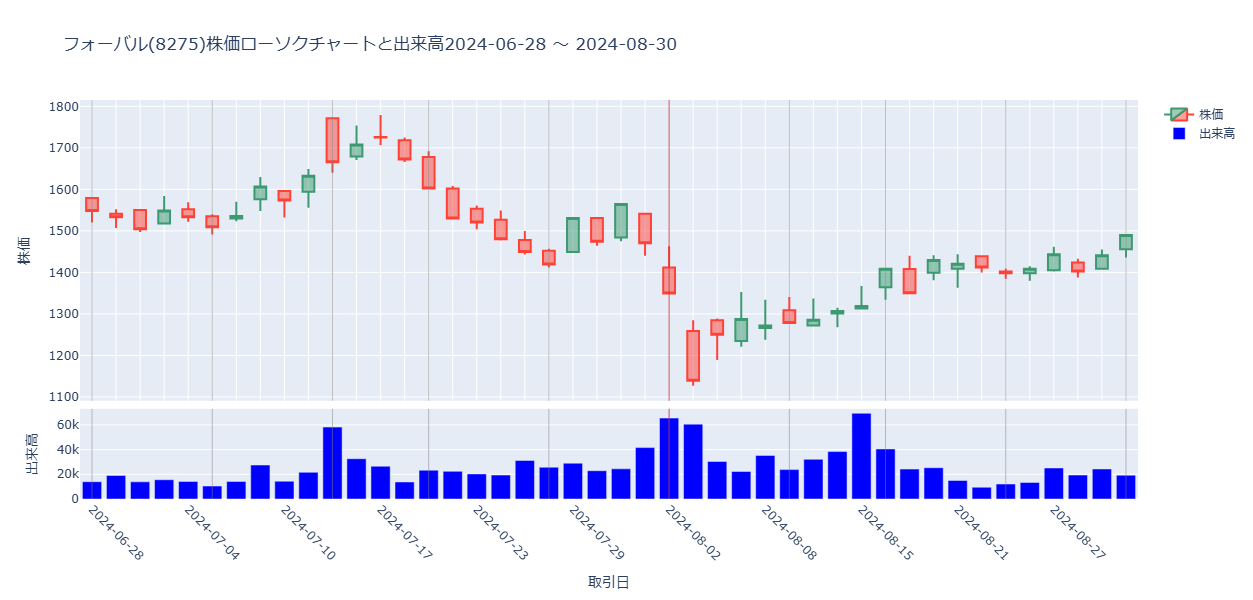

In [110]:
# 日足チャート
start_date = dt - relativedelta(days = 7 * (weeks + 1))
end_date = dt + relativedelta(days = 7 * weeks)
PFIG = PricelistFig(code, start_date=start_date, end_date=end_date)

# 週末にvline
df = read_data(fp)
RPL = PricelistPl(df)
df = RPL.df
df = df.filter(pl.col("code")==code)\
.filter(pl.col("date")>=start_date)\
.filter(pl.col("date")<=end_date)
RPL = PricelistPl(df)
RPL.with_columns_weekid()
pdf = RPL.df
pdf = pdf.group_by(["weekid"]).agg([
    pl.col("date").last()
]).sort(by=["weekid"])
vline_dates = pdf["date"].to_list()
#vline_dates.remove(dt)
for d in vline_dates:
    PFIG.add_vline(d)

# 該当日にvline
PFIG.add_vline(dt, color="red")

PFIG.fig.show()